# Goal
* Credit Fraud Detection
* Imbalance classification problem
* Oversampling with SMOTE
* Machine Learning approach
* Deep Learning approach

## Import necessary libraries

In [85]:
import time
import collections
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the dataset

In [86]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Aanalysis (EDA)

In [87]:
print(df.shape)
"""
80/20 can be a good train test ratio.
Total number of samples = 284807. It's a lot of data.
So 20% will be 56k which is a good amount of data for the test set.
"""
print("10% of total data:", int(df.shape[0]*.2)) 

(284807, 31)
10% of total data: 56961


In [88]:
"""
Check null values.
There is no null values in this dataset.
We are good to go for further steps.
"""
print(sum(df.isnull().sum()))

0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [90]:
"""
See the number of each class.
99.83% data poitns are in one class
00.17% data points are in another class.
We have a clear class imbalance here.
"""
print(df['Class'].value_counts(normalize=True))

0    0.998273
1    0.001727
Name: Class, dtype: float64


In [91]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


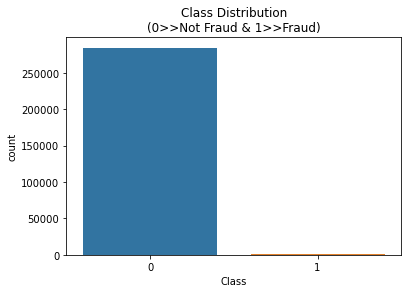

In [92]:
## Count plot of the target coulumn.
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution\n(0>>Not Fraud & 1>>Fraud)")
plt.show()

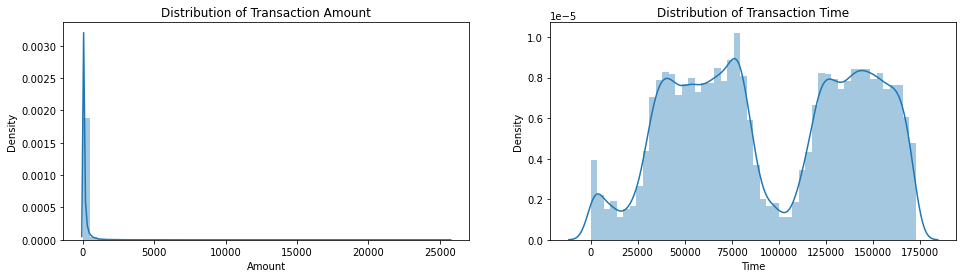

In [93]:
fig, ax = plt.subplots(1, 2,figsize=(16,4))
sns.distplot(df['Amount'], ax=ax[0])
sns.distplot(df['Time'], ax=ax[1])
ax[0].set_title("Distribution of Transaction Amount")
ax[1].set_title("Distribution of Transaction Time")
plt.show()

## Train test split

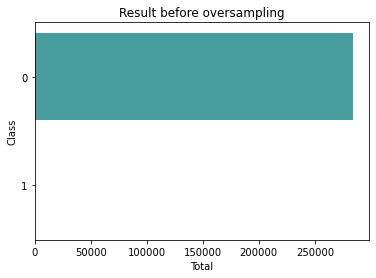

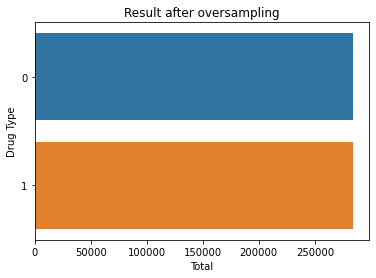

In [94]:
X = df.drop('Class', axis=1)
y = df['Class']

sns.countplot(y=y, data=df, palette="mako_r")
plt.title("Result before oversampling")
plt.ylabel('Class')
plt.xlabel('Total')
plt.show()

from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

sns.countplot(y=y, data=df)
plt.title("Result after oversampling")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=42)

## Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1. Machine Learning Approach
## Modeling & performance evaluation

In [97]:
def model(clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return y_pred

def performance(y_true, y_pred):
    print("======================================================")
    print(classification_report(y_test,y_pred))
    print("======================================================")
    print("Overall accuracy = ",accuracy_score(y_test,y_pred))

## SVM model
<figure>
<img src = "https://raw.githubusercontent.com/shuvo14051/Share-images/master/SVM_imbalance.jpg" height=400 width=400>
  <figcaption>Result of SVM without balancing the dataset</figcaption>
</figure>

In [98]:
y_pred = model(SVC())
performance(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56863
           1       0.99      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Overall accuracy =  0.9864498883280868


## Logistic Regression
<figure>
<img src = "https://raw.githubusercontent.com/shuvo14051/Share-images/master/LogiticRegression_imbalance.jpg" height=400 width=400>
  <figcaption>Result of LogisticRegression without balancing the dataset</figcaption>
</figure>

In [99]:
y_pred = model(LogisticRegression())
performance(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56863
           1       0.99      0.96      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

Overall accuracy =  0.9768302762780718


## RandomForest classifier
<figure>
<img src = "https://raw.githubusercontent.com/shuvo14051/Share-images/master/RandomForest_imbalance.jpg" height=400 width=400>
  <figcaption>Result of RandomForest without balancing the dataset</figcaption>
</figure>


In [100]:
y_pred = model(RandomForestClassifier())
performance(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Overall accuracy =  0.9998417248474404


## KNN
<figure>
<img src = "https://raw.githubusercontent.com/shuvo14051/Share-images/master/KNN_imbalance.jpg" height=400 width=400>
  <figcaption>Result of KNN without balancing the dataset</figcaption>
</figure>

In [101]:
y_pred = model(KNeighborsClassifier())
performance(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Overall accuracy =  0.9993668993897613


# 2. Deep Learning Approach

In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [117]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(25, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(11, activation = 'relu',))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min')


In [119]:
result = model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=128, 
          validation_data=(X_test,y_test),
          )

Epoch 1/50
3554/3554 [==============================] - 19s 5ms/step - loss: 0.1015 - accuracy: 0.9641 - val_loss: 0.0522 - val_accuracy: 0.9815
Epoch 2/50
3554/3554 [==============================] - 16s 5ms/step - loss: 0.0614 - accuracy: 0.9787 - val_loss: 0.0649 - val_accuracy: 0.9787
Epoch 3/50
3554/3554 [==============================] - 17s 5ms/step - loss: 0.0534 - accuracy: 0.9814 - val_loss: 0.0556 - val_accuracy: 0.9800
Epoch 4/50
3554/3554 [==============================] - 17s 5ms/step - loss: 0.0483 - accuracy: 0.9832 - val_loss: 0.1123 - val_accuracy: 0.9490
Epoch 5/50
3554/3554 [==============================] - 16s 5ms/step - loss: 0.0476 - accuracy: 0.9834 - val_loss: 0.0564 - val_accuracy: 0.9791
Epoch 6/50
3554/3554 [==============================] - 18s 5ms/step - loss: 0.0446 - accuracy: 0.9843 - val_loss: 0.1769 - val_accuracy: 0.9642
Epoch 7/50
3554/3554 [==============================] - 18s 5ms/step - loss: 0.0428 - accuracy: 0.9852 - val_loss: 0.0356 - val_ac

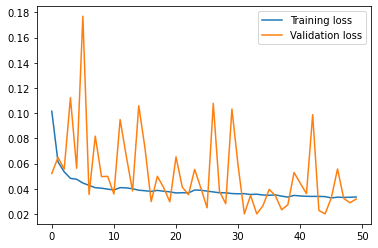

In [120]:
loss_df = pd.DataFrame(model.history.history)
plt.plot(loss_df['loss'], label='Training loss')
plt.plot(loss_df['val_loss'], label='Validation loss')
plt.legend()

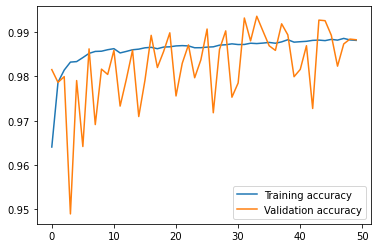

In [121]:
plt.plot(loss_df['accuracy'], label='Training accuracy')
plt.plot(loss_df['val_accuracy'], label='Validation accuracy')
plt.legend()

In [122]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()
performance(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.98      1.00      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Overall accuracy =  0.988278845646554
